In [1]:
# AG_ADC1
#plots all mean profiles


In [2]:

import matplotlib.pyplot as plt # plotting
import numpy as np              # working with number arrays etc.
from netCDF4 import Dataset     # reading netcdf files
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
# path for data
path_les= "../DATA_ADC_paper1/LES/"
path_adc= "../DATA_ADC_paper1/ADC/"
path_les= "/Users/amrapalli/Desktop/DATA_ADC_paper1/LES/"
path_adc= "/Users/amrapalli/Desktop/DATA_ADC_paper1/ADC/"

In [4]:
# density calculation from given temp and salinity
def w_rho_eos(wt,ws):
    alpha=2e-4; beta=8e-4; g=9.81; rho=1026.0
    w_rho=(alpha*wt-beta*ws)
    #wb=g*(alpha*wt-beta*ws)
    return w_rho



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


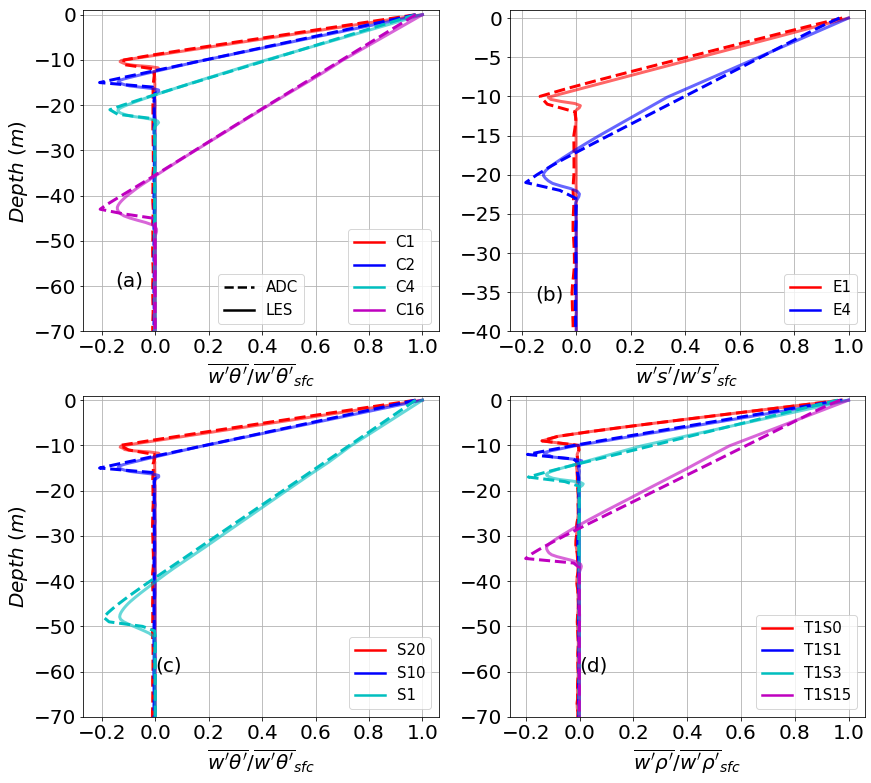

In [5]:
# plot of mean profiles
# final hour 
t=95
# average duration
t1=t-6  
#depth
d=70
c=0 #cell number

# plot
fig = plt.figure(figsize=(14,13))
#all C cases
plt.subplot(221)
#file names
file_names_les = [*[f"Cooling{x}" for x in [1, 2, 4, 16]]] ; line_styles_les = ["-r", "-b", "-c", "-m" ]
file_names_adc = [*[f"C{x}" for x in [1, 2, 4, 16]]]; line_styles_adc = ["--r", "--b", "--c", "--m" ]

#plot LES
for fn, fm, ls, ls1 in zip(file_names_les, file_names_adc, line_styles_les, line_styles_adc):
    les= Dataset(path_les+f'{fn}.nc', mode='r')
    plt.plot(np.mean(les.variables["wt"][t1:t,:],axis=0)/les.variables["wt"][0,0],les.variables["zt"][:],ls,alpha=0.6,linewidth=3)
    
#plot ADC

#for fn, ls in zip(file_names_adc, line_styles_adc):
    fh=Dataset(path_adc+'output.0001-01-01_00.00_1m.nc', mode='r') 
    mf= Dataset(path_adc+f'adcTurbulenceArrays_{fm}_1m.nc', mode='r')
    wt=(mf.variables['wt'][t1:t,0,:]
       +mf.variables['areaFraction'][t1:t,0,:]*mf.variables['wt_spsD'][t1:t,0,:]
       +(1- mf.variables['areaFraction'][t1:t,c,:])*mf.variables['wt_spsU'][t1:t,0,:]
       )
    plt.plot(np.mean(wt[:,:-1],axis=0)/les.variables["wt"][0,0],fh.variables['zTop'][1,1,:],ls1,linewidth=3)

    
legend_elements1=[Line2D([0], [0], linestyle='-', color='r', label='C1',markerfacecolor='k', linewidth=2.5),                 
                  Line2D([0], [0], linestyle='-', color='b', label='C2',markerfacecolor='k', linewidth=2.5),
                  Line2D([0], [0], linestyle='-', color='c', label='C4',markerfacecolor='k', linewidth=2.5),
                  Line2D([0], [0], linestyle='-', color='m', label='C16',markerfacecolor='k', linewidth=2.5),] 
legend=plt.legend(handles=legend_elements1,loc="lower right",fontsize=15)

#additional legend
legend_elements2 = [Line2D([0], [0], linestyle='--', color='k', label='ADC',markerfacecolor='k', linewidth=2.5),                 
                   Line2D([0], [0], linestyle='-', color='k', label='LES',markerfacecolor='k', linewidth=2.5),]                 
legend2=plt.legend(handles=legend_elements2,loc="lower center",fontsize=15)
plt.gca().add_artist(legend)
#axis properties
plt.ylim(-d,1)
plt.ylabel('$Depth $ $(m)$ ',fontsize=20)
plt.xticks(fontsize=20); plt.yticks(fontsize=20)
plt.xlabel('$\overline{w^\prime\\theta^\prime}/\overline{w^\prime\\theta^\prime}_{sfc}$',fontsize=20)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.text(-0.15,-60, r'(a)', fontsize=20)
plt.grid()




plt.subplot(222)
#file names
file_names_les = [*[f"Evap{x}" for x in [1, 4]]] ; line_styles_les = ["-r", "-b", "-c", "-m" ]
file_names_adc = [*[f"E{x}" for x in [1, 4]]]; line_styles_adc = ["--r", "--b", "--c", "--m" ]
#plot LES
for fn, fm, ls, ls1 in zip(file_names_les, file_names_adc, line_styles_les, line_styles_adc):
    les= Dataset(path_les+f'{fn}.nc', mode='r')
    plt.plot(np.mean(les.variables["ws"][t1:t,:],axis=0)/les.variables["ws"][0,0],les.variables["zt"][:],ls,alpha=0.6,linewidth=3)

#plot ADC
#for fn, ls in zip(file_names_adc, line_styles_adc):
    fh=Dataset(path_adc+'output.0001-01-01_00.00_1m.nc', mode='r') 
    mf= Dataset(path_adc+f'adcTurbulenceArrays_{fm}_1m.nc', mode='r')
    ws=(mf.variables['ws'][t1:t,0,:]
       +mf.variables['areaFraction'][t1:t,0,:]*mf.variables['ws_spsD'][t1:t,0,:]
       +(1- mf.variables['areaFraction'][t1:t,c,:])*mf.variables['ws_spsU'][t1:t,0,:]
       )
    plt.plot(np.mean(ws[:,:-1],axis=0)/les.variables["ws"][0,0],fh.variables['zTop'][1,1,:],ls1,linewidth=3)
legend_elements1=[Line2D([0], [0], linestyle='-', color='r', label='E1',markerfacecolor='k', linewidth=2.5),                 
                  Line2D([0], [0], linestyle='-', color='b', label='E4',markerfacecolor='k', linewidth=2.5),
                ] 
legend=plt.legend(handles=legend_elements1,loc="lower right",fontsize=15)
#axis properties
plt.ylim(-40,1)
plt.grid()
plt.xlabel('$\overline{w^\prime s^\prime}/\overline{w^\prime s^\prime}_{sfc}$',fontsize=20)
plt.text(-.15,-36, r'(b)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)




plt.subplot(223)
file_names_les = [*[f"Strat{x}" for x in [20, 10, 1]]] ; line_styles_les = ["-r", "-b", "-c", "-m" ]
file_names_adc = [*[f"S{x}" for x in [20,10, 1]]]; line_styles_adc = ["--r", "--b", "--c", "--m" ]

#plot LES
for fn, fm, ls, ls1 in zip(file_names_les, file_names_adc, line_styles_les, line_styles_adc):
    les= Dataset(path_les+f'{fn}.nc', mode='r')
    plt.plot(np.mean(les.variables["wt"][t1:t,:],axis=0)/les.variables["wt"][0,0],les.variables["zt"][:],ls,alpha=0.6,linewidth=3)

#plot ADC
#for fn, ls in zip(file_names_adc, line_styles_adc):
    fh=Dataset(path_adc+'output.0001-01-01_00.00_1m.nc', mode='r') 
    mf= Dataset(path_adc+f'adcTurbulenceArrays_{fm}_1m.nc', mode='r')
    wt=(mf.variables['wt'][t1:t,0,:]
       +mf.variables['areaFraction'][t1:t,0,:]*mf.variables['wt_spsD'][t1:t,0,:]
       +(1- mf.variables['areaFraction'][t1:t,c,:])*mf.variables['wt_spsU'][t1:t,0,:]
       )
    plt.plot(np.mean(wt[:,:-1],axis=0)/les.variables["wt"][0,0],fh.variables['zTop'][1,1,:],ls1,linewidth=3)
legend_elements1=[Line2D([0], [0], linestyle='-', color='r', label='S20',markerfacecolor='k', linewidth=2.5),                 
                  Line2D([0], [0], linestyle='-', color='b', label='S10',markerfacecolor='k', linewidth=2.5),
                  Line2D([0], [0], linestyle='-', color='c', label='S1',markerfacecolor='k', linewidth=2.5),] 
legend=plt.legend(handles=legend_elements1,loc="lower right",fontsize=15)    
plt.ylim(-d,1)
plt.grid()
plt.xlabel('$\overline{w^\prime\\theta^\prime}/\overline{w^\prime\\theta^\prime}_{sfc}$ ',fontsize=20)
plt.text(1e-5,-60, r'(c)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('$Depth $ $(m)$ ',fontsize=20)

plt.subplot(224)  

file_names_les = [*[f"T1S{x}" for x in [0,1, 3,15]]] ; line_styles_les = ["-r", "-b", "-c", "-m" ]
file_names_adc = [*[f"T1S{x}" for x in [0, 1,3,15]]]; line_styles_adc = ["--r", "--b", "--c", "--m" ]


#plot LES
for fn, fm, ls, ls1 in zip(file_names_les, file_names_adc, line_styles_les, line_styles_adc):
    les= Dataset(path_les+f'{fn}.nc', mode='r')
    
    #plt.plot(np.mean(w_rho_eos(les.variables["wt"][t1:t,:],
     #           les.variables["ws"][t1:t,:]),axis=0)/w_rho_eos(les.variables["wt"][0,0],
      #          les.variables["ws"][0,0]),les.variables["zt"][:],ls,alpha=0.6,linewidth=3)
#plot ADC
#for fn, ls in zip(file_names_adc, line_styles_adc):
    fh=Dataset(path_adc+'output.0001-01-01_00.00_1m.nc', mode='r') 
    mf= Dataset(path_adc+f'adcTurbulenceArrays_{fm}_1m.nc', mode='r')
    wt=(mf.variables['wt'][t1:t,c,:]
       +mf.variables['areaFraction'][t1:t,c,:]*mf.variables['wt_spsD'][t1:t,c,:]
       +(1- mf.variables['areaFraction'][t1:t,c,:])*mf.variables['wt_spsU'][t1:t,c,:]
       )
    ws=(mf.variables['ws'][t1:t,c,:]
       +mf.variables['areaFraction'][t1:t,c,:]*mf.variables['ws_spsD'][t1:t,c,:]
       +(1- mf.variables['areaFraction'][t1:t,c,:])*mf.variables['ws_spsU'][t1:t,c,:]
       )
    
    if "T1S0" in fn:
        plt.plot(np.mean(w_rho_eos(wt[:,:-1],ws[:,:-1]),axis=0)/w_rho_eos(les.variables["wt"][0,0],
                les.variables["ws"][0,0]),fh.variables['zTop'][1,1,:],'-r',alpha=0.6,linewidth=3)
        plt.plot(np.mean(w_rho_eos(wt[:,:-1],ws[:,:-1]),axis=0)/w_rho_eos(les.variables["wt"][0,0],
                les.variables["ws"][0,0]),fh.variables['zTop'][1,1,:],'--r',linewidth=3)
    else:
        plt.plot(np.mean(w_rho_eos(les.variables["wt"][t1:t,:],
              les.variables["ws"][t1:t,:]),axis=0)/w_rho_eos(les.variables["wt"][0,0],
              les.variables["ws"][0,0]),les.variables["zt"][:],ls,alpha=0.6,linewidth=3)
        plt.plot(np.mean(w_rho_eos(wt[:,:-1],ws[:,:-1]),axis=0)/w_rho_eos(les.variables["wt"][0,0],
                les.variables["ws"][0,0]),fh.variables['zTop'][1,1,:],ls1,linewidth=3)
#plt.xlim(1026,1027.5)
legend_elements1=[Line2D([0], [0], linestyle='-', color='r', label='T1S0',markerfacecolor='k', linewidth=2.5),                 
                  Line2D([0], [0], linestyle='-', color='b', label='T1S1',markerfacecolor='k', linewidth=2.5),
                  Line2D([0], [0], linestyle='-', color='c', label='T1S3',markerfacecolor='k', linewidth=2.5),
                  Line2D([0], [0], linestyle='-', color='m', label='T1S15',markerfacecolor='k', linewidth=2.5),] 
legend=plt.legend(handles=legend_elements1,loc="lower right",fontsize=15)
plt.grid()
plt.xlabel('$\overline{w^\prime \\rho^\prime}/\overline{w^\prime \\rho^\prime}_{sfc}$ ',fontsize=20)
#plt.title("$Q_H=-50$ $W/m^2$",fontsize=14)

plt.ylim(-70,1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(1e-8,-60, r'(d)', fontsize=20)

plt.savefig("wt_les_adc_2.eps")
